In [ ]:
import glob
from glob import glob
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import cv2
from PIL import Image
from numpy import asarray
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

In [ ]:
df_dir= '/content/drive/MyDrive/Assignment1_Dataset/firmware/firmware.csv'
train_data_dir = '/content/drive/MyDrive/Assignment1_Dataset/imagery'

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(df_dir)
CATEGORIES=list(df['class'].unique())
#CATEGORIES = [x.split("/")[-1] for x in glob(train_data_dir+'/*')]

In [ ]:
training_data = []
def create_training_data():
  for filename,classname in zip(df['filename'],df['class']):
      path=os.path.join(train_data_dir,classname,filename)+".jpg"
      class_num = CATEGORIES.index(classname)  
      
      
      try:
                  img_array = cv2.imread(path)  
                  new_array = cv2.resize(img_array, (300, 300))
                  training_data.append([new_array, class_num])  
                  
      except Exception as e:  
            pass
              

create_training_data()


In [ ]:
len(training_data)

3813

In [ ]:
CATEGORIES

['malware', 'hackware', 'benignware']

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(train_data_dir,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (300, 300))
                training_data.append([new_array, class_num])  
                
            except Exception as e:  
                pass
            

create_training_data()

In [ ]:
X=[]
Y=[]
for value in training_data:
    X.append(value[0])
    Y.append(value[1]) 
X=np.array(X)
Y=np.array(Y)    

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelEncoder= LabelEncoder()

In [ ]:
model1=Sequential()
#first layer
model1.add(Dense(100,input_shape=(270000,)))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

#second layer
model1.add(Dense(100))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))

#third layer
model1.add(Dense(100))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))

#fourth layer
model1.add(Dense(100))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))

#fifth layer
model1.add(Dense(100))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))



#final layer
model1.add(Dense(3))
model1.add(Activation('softmax'))

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001)
model1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
X_train_new=[]
X_test_new=[]
for value in X_train:
    X_train_new.append(value.flatten())
for value in X_test:
    X_test_new.append(value.flatten())  

X_train_new=np.array(X_train_new)
X_test_new=np.array(X_test_new)
Y_train_new=to_categorical(labelEncoder.fit_transform(Y_train))
Y_test_new=to_categorical(labelEncoder.fit_transform(Y_test))
X_train_new.shape

(3050, 270000)

In [ ]:
history1=model1.fit(X_train_new,Y_train_new,batch_size=20,epochs=100,validation_data=(X_test_new,Y_test_new))

Epoch 1/100
153/153 [==============================] - 6s 28ms/step - loss: 38.3186 - accuracy: 0.6708 - val_loss: 0.7118 - val_accuracy: 0.7785
Epoch 2/100
153/153 [==============================] - 5s 32ms/step - loss: 0.5907 - accuracy: 0.7879 - val_loss: 0.5291 - val_accuracy: 0.7785
Epoch 3/100
153/153 [==============================] - 5s 34ms/step - loss: 0.5642 - accuracy: 0.7879 - val_loss: 0.5815 - val_accuracy: 0.7785
Epoch 4/100
153/153 [==============================] - 5s 32ms/step - loss: 0.5539 - accuracy: 0.7885 - val_loss: 0.5551 - val_accuracy: 0.7785
Epoch 5/100
153/153 [==============================] - 4s 29ms/step - loss: 0.5505 - accuracy: 0.7879 - val_loss: 0.5532 - val_accuracy: 0.7785
Epoch 6/100
153/153 [==============================] - 4s 26ms/step - loss: 0.5483 - accuracy: 0.7882 - val_loss: 0.5513 - val_accuracy: 0.7785
Epoch 7/100
153/153 [==============================] - 5s 34ms/step - loss: 0.5728 - accuracy: 0.7875 - val_loss: 0.5753 - val_accuracy

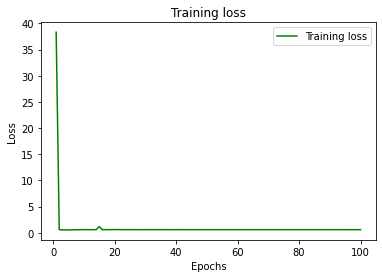

In [ ]:
import matplotlib.pyplot as plt


loss_val = history1.history['loss']
epochs = range(1,101)

plt.plot(epochs, loss_val, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

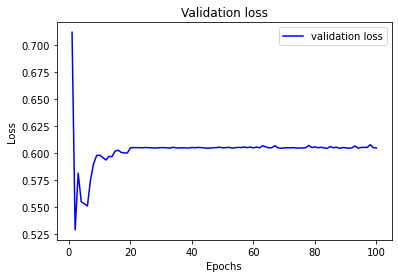

In [ ]:
import matplotlib.pyplot as plt


loss_val = history1.history['val_loss']
epochs = range(1,101)

plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model1.evaluate(X_test_new,Y_test_new,verbose=0)[1]

0.7785059213638306

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

In [ ]:
model2 = Sequential()
model2.add(Conv2D(48, kernel_size = (5, 5),  
   activation = 'relu', input_shape=(300,300,3)))
model2.add(Conv2D(32, (3, 3), activation = 'relu')) 
model2.add(Flatten()) 
model2.add(Dense(48, activation = 'relu')) 
model2.add(Dense(10, activation = 'softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 48)      3648      
                                                                 
 conv2d_1 (Conv2D)           (None, 294, 294, 32)      13856     
                                                                 
 flatten (Flatten)           (None, 2765952)           0         
                                                                 
 dense_7 (Dense)             (None, 48)                132765744 
                                                                 
 dense_8 (Dense)             (None, 10)                490       
                                                                 
Total params: 132,783,738
Trainable params: 132,783,738
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history2=model2.fit(X_train,Y_train,epochs=10,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/10
96/96 [==============================] - 77s 687ms/step - loss: 29.8752 - accuracy: 0.8761 - val_loss: 0.0546 - val_accuracy: 0.9843
Epoch 2/10
96/96 [==============================] - 63s 660ms/step - loss: 0.0190 - accuracy: 0.9961 - val_loss: 0.0088 - val_accuracy: 0.9987
Epoch 3/10
96/96 [==============================] - 63s 661ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 0.9974
Epoch 4/10
96/96 [==============================] - 64s 662ms/step - loss: 2.0036e-04 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 0.9987
Epoch 5/10
96/96 [==============================] - 64s 662ms/step - loss: 8.3900e-05 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9987
Epoch 6/10
96/96 [==============================] - 64s 662ms/step - loss: 5.1991e-05 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 0.9987
Epoch 7/10
96/96 [==============================] - 63s 661ms/step - loss: 4.0487e-05 - accuracy: 1.0000 - val_loss: 0.0053 - val

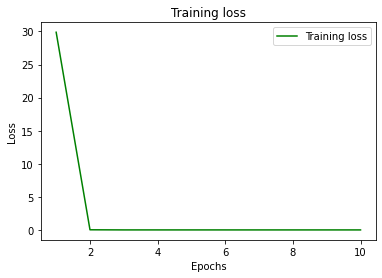

In [ ]:
import matplotlib.pyplot as plt


loss_val = history2.history['loss']
epochs = range(1,11)

plt.plot(epochs, loss_val, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

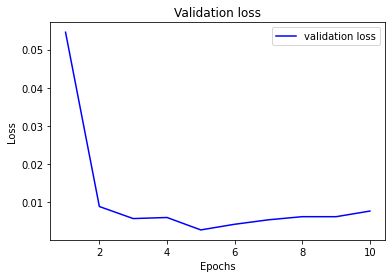

In [ ]:
import matplotlib.pyplot as plt


loss_val = history2.history['val_loss']
epochs = range(1,11)

plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()